In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 180 # 180/169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())
print(teams)
print(teams_id)

draw_id = 1
types = ["Pressure"]
df = df_events[df_events["type_name"].isin(types)].reset_index(drop=True)
# df = df[df["position_name"] != "Goalkeeper"].reset_index(drop=True)
df = df[df["possession_team_id"] == teams_id[abs(draw_id-1)]].reset_index(drop=True)
df = df[df["team_id"] == teams_id[draw_id]].reset_index(drop=True)

['Borussia Dortmund', 'Bayern Munich']
[180, 169]


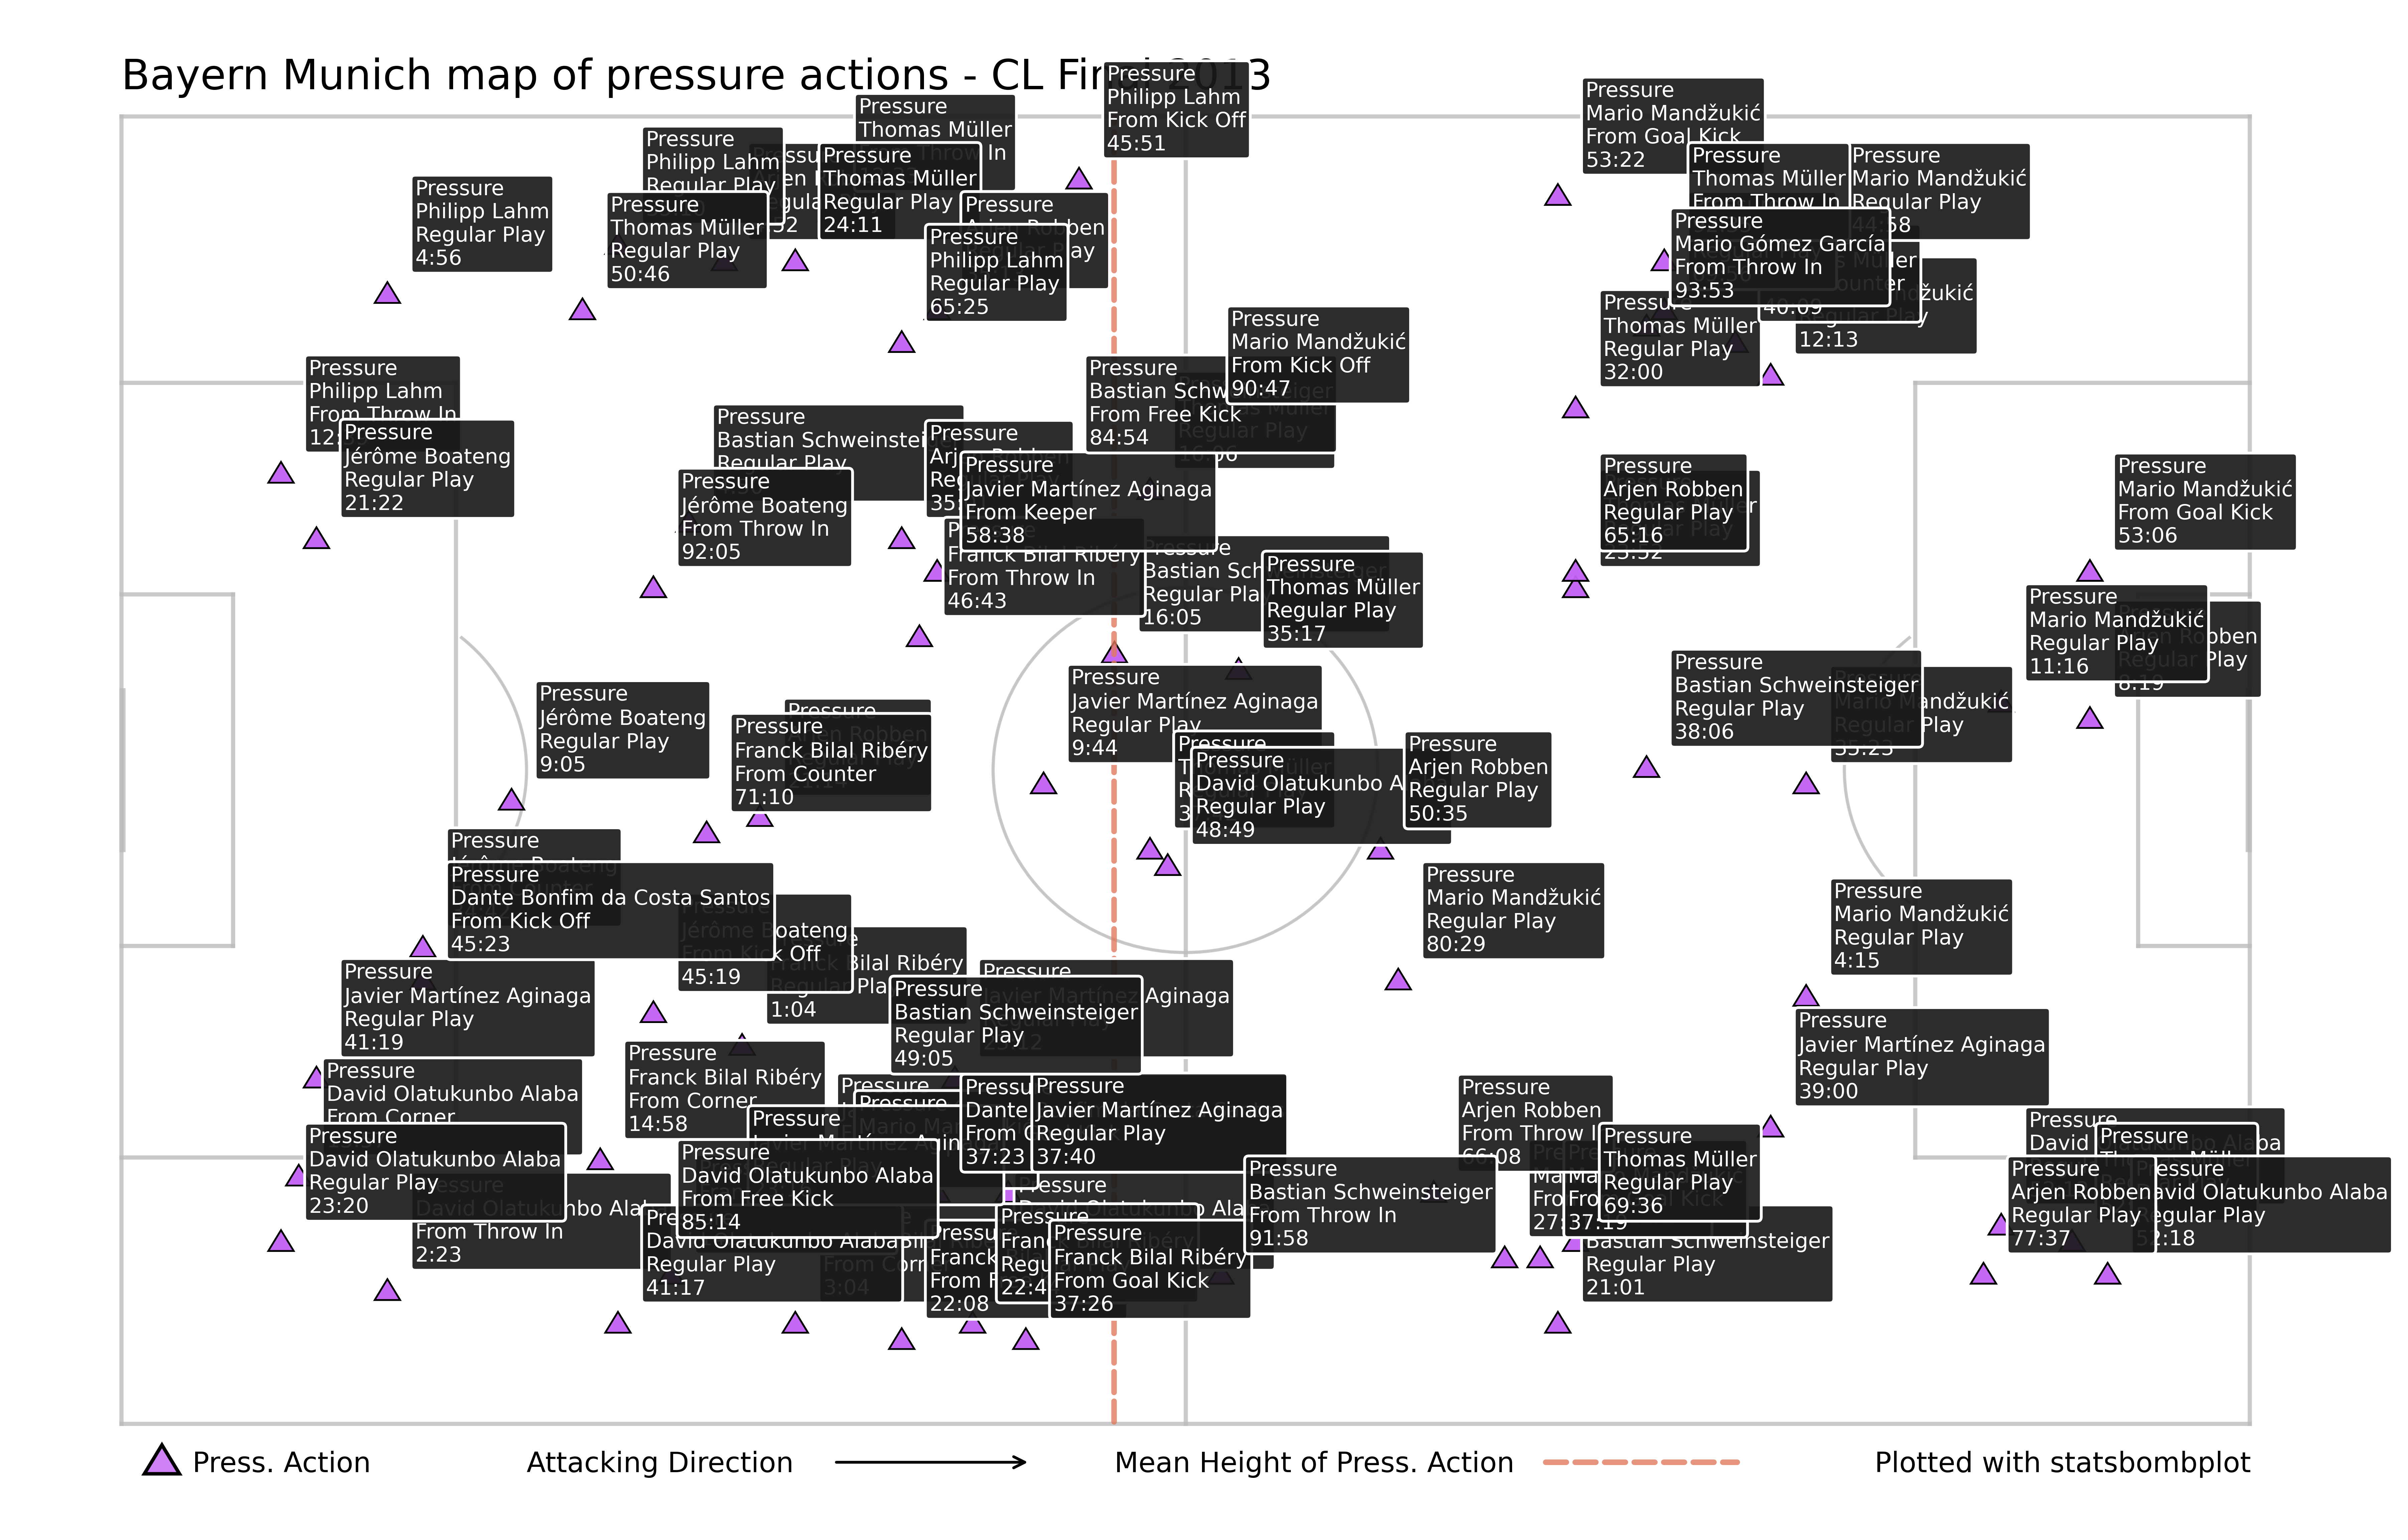

In [3]:
import statsbombplot as sbp

sbp.events.draw_pressures(df, "pressures_test", f'{teams[draw_id]} map of pressure actions - CL Final 2013')